# Digitale Techniken: Some data analysis code for weatherstation data
January 2023, J. Kerch

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" style="height:50px" align="left"/> <br><br>

https://creativecommons.org/licenses/by-nc-sa/4.0/

You can use code from this jupyter notebook (specifically, for your project work), if you declare it.<br>
But please, don't just copy and paste it, instead adapt it to your needs, write your own comments.

### Before the analysis: consider metadata of all the measurements
- which data is matching your own measurement period?
- which data are outdoor/indoor measurements?
- which data do you think is interesting to look at or comparable with your own data?
- collect coordinates of all measurements (3 columns: lat/long/owner, make sure you use the required format for the coordinates, might need to convert)

## Overview

Not all aspects might be relevant to your work.

- Access the data files
- Assess metadata
- Split data file with multiple data sets
- Open and read data file **(the standard way)**
- Read data file to access the data as data frame **(the pandas way)**
- Read the data as a structured array using a conversion function for datetime **(the numpy way)**

In [1]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from io import StringIO

### Access the data files

In [2]:
# create path to data in txt format
# get files as sorted list from this path
path = os.path.join( "data_incorrect_time/",'*.txt')
files = sorted(glob(path))

print(path)
print(files)

data_incorrect_time/*.txt
['data_incorrect_time/01051302.txt', 'data_incorrect_time/01051302_1.txt']


### Open and read data file (the standard way)

In [3]:
# open data file by reading it line by line
with open(files[1],'r') as file:
    data_lines = file.readlines()

In [4]:
# how much data (lines i.e. measurements incl. header)?
# too long to print() -- will return an error connected to jupyter settings
len(data_lines)

14

In [5]:
# quick look at the first 10 lines, note the newline escape sequence
print(data_lines[0:10])

['datetime,lightIntensity,temperature,relHumidity,ppmCO2\n', '2022-01-05 13:02:24,42,24.12,52.34,29\n', '2022-01-05 13:02:27,43,24.11,52.06,44\n', '2022-01-05 13:02:30,43,24.12,51.90,49\n', '2022-01-05 13:02:39,43,24.12,51.74,493\n', '2022-01-05 13:02:43,29,24.11,51.34,502\n', '2022-01-05 13:02:47,28,24.11,51.27,502\n', '2022-01-05 13:02:51,28,24.12,51.11,502\n', '2022-01-05 13:02:55,28,24.11,50.94,502\n', '2022-01-05 13:02:59,27,24.11,50.79,502\n']


In [6]:
# how does the header look?(header of WiSe2021/22 measurements)
print(data_lines[0])

datetime,lightIntensity,temperature,relHumidity,ppmCO2



In [7]:
# assign the header
header = data_lines[0]

Follow up with earlier notebooks from the course to turn the data lines into columns that represent the data series.

### Split data file with multiple data sets

In [8]:
# following an earlier example with several data sets (with header line each) combined in one file,
# let's check how many data sets in this file
# find header lines (indices) using "list comprehension"
# e.g https://www.kite.com/python/answers/how-to-find-the-index-of-list-elements-that-meet-a-condition-in-python

header_indices = [index for index, line in enumerate(data_lines) if line == header]
print(header_indices)

[0]


In [9]:
# or read data (not as lines) and use header line found above
with open(files[1],'r') as file:
    data = file.read()

In [10]:
# splitting the data using the header removes the header at the same time
blocks = data.split(header)
len(blocks)

2

In [11]:
# first data set is 2nd block (first block is empty due to split by header)
print(blocks[1][0:500])

2022-01-05 13:02:24,42,24.12,52.34,29
2022-01-05 13:02:27,43,24.11,52.06,44
2022-01-05 13:02:30,43,24.12,51.90,49
2022-01-05 13:02:39,43,24.12,51.74,493
2022-01-05 13:02:43,29,24.11,51.34,502
2022-01-05 13:02:47,28,24.11,51.27,502
2022-01-05 13:02:51,28,24.12,51.11,502
2022-01-05 13:02:55,28,24.11,50.94,502
2022-01-05 13:02:59,27,24.11,50.79,502
2022-01-05 13:03:03,27,24.11,50.64,502
2022-01-05 13:03:07,29,24.11,50.51,502
2022-01-05 13:03:11,27,24.11,50.40,502
2022-01-05 13:03:15,27,24.12,50.30,


In [12]:
# write separate files for each block
# for loop using the indices of header lines found before
# case differentiation for the last block to get to the last line of data_lines by simply leaving out a value after the colon

for i in range(len(header_indices)):
    print(i+1)
    filename = files[0].split(".txt")[-2] + "_" + str(i+1) + ".txt"
    if i < len(header_indices)-1:
        with open(filename, "w") as f:
            f.writelines(data_lines[header_indices[i]:header_indices[i+1]])
    else:
        with open(filename, "w") as f:
            f.writelines(data_lines[header_indices[i]:])

1


In [13]:
# get a new list of data files
path = os.path.join("..", "data",'*.txt')
files = sorted(glob(path))

print(path)
print(files)

../data/*.txt
['../data/data_joker.txt', '../data/data_joker_1.txt']


### Read data file to access the data as data frame (the pandas way)

As we are dealing with mixed type data, pandas is a sensible choice.

In [14]:
# .read_csv reads most text-based formats and stores the data in a pandas data frame

df = pd.read_csv(files[1], sep=',')

In [15]:
# print the data frame
df

,datetime,lightIntensity,temperature,relativeHumidity,ppmCO2
0,2022-01-06 13:41:28,49,22.40,49.74,493
1,2022-01-06 13:41:32,993,21.92,46.39,502
2,2022-01-06 13:41:36,998,21.79,44.05,502
3,2022-01-06 13:41:40,998,21.65,41.93,502
4,2022-01-06 13:41:44,998,21.43,40.07,502
...,...,...,...,...,...
38332,2022-01-08 08:32:57,23,2.94,81.24,408
38333,2022-01-08 08:33:01,16,2.93,81.21,408
38334,2022-01-08 08:33:05,16,2.94,81.18,408
38335,2022-01-08 08:33:09,16,2.94,81.13,408


In [16]:
# checking the datatype: the first column is in fact containing the date and time as a string (object)
df.dtypes

datetime             object
lightIntensity        int64
temperature         float64
relativeHumidity    float64
ppmCO2                int64
dtype: object

In [17]:
# access the columns ("series") of the data frame similar to a dictionary with column label as "key"
df["temperature"]

0        22.40
1        21.92
2        21.79
3        21.65
4        21.43
         ...  
38332     2.94
38333     2.93
38334     2.94
38335     2.94
38336     2.91
Name: temperature, Length: 38337, dtype: float64

In [18]:
type(df["temperature"])

pandas.core.series.Series

In [19]:
# shape provides (n_rows, n_columns)
df["temperature"].shape

(38337,)

In [20]:
# collect a subset, e.g. several columns, using a list, i.e. a second set of []
df[["relativeHumidity", "temperature"]]

,relativeHumidity,temperature
0,49.74,22.40
1,46.39,21.92
2,44.05,21.79
3,41.93,21.65
4,40.07,21.43
...,...,...
38332,81.24,2.94
38333,81.21,2.93
38334,81.18,2.94
38335,81.13,2.94


In [21]:
# selecting specific values based on their location, i.e. indices
df.iloc[0:4,2]

0    22.40
1    21.92
2    21.79
3    21.65
Name: temperature, dtype: float64

In [22]:
# but we actually want the date and time to be recognized as such to be able to use it for plotting
# with pandas the column can be made into pd.Timestamp objects simply while reading the data to a data frame
# with parse_dates and the column index which should be parsed

df = pd.read_csv(files[1], index_col=0, parse_dates=True)

In [23]:
# see also parse_dates in documentation 
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

Without using pandas this would be done by converting the datetime string to a datetime.datetime object (used for example in the correct_arduino_timestamp.ipynb), see also below.


In [24]:
# just print the first 5 lines with head()
df.head()

,lightIntensity,temperature,relativeHumidity,ppmCO2
datetime,,,,
2022-01-06 13:41:28,49,22.40,49.74,493
2022-01-06 13:41:32,993,21.92,46.39,502
2022-01-06 13:41:36,998,21.79,44.05,502
2022-01-06 13:41:40,998,21.65,41.93,502
2022-01-06 13:41:44,998,21.43,40.07,502


<Axes: xlabel='datetime'>

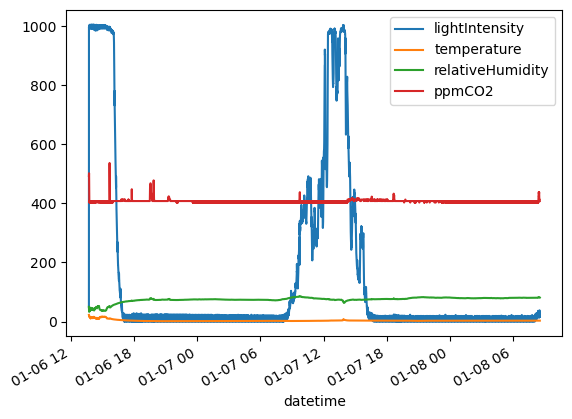

In [25]:
# simply plot all columns/series in the data frame for a first assessment
# the timestamp column is automatically taken for the x-axis and a legend is printed
df.plot()

#### Further resources

https://pandas.pydata.org/docs/user_guide/10min.html#plotting

https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#pandas.Timestamp


### Read the data as a structured array using a conversion function for datetime (the numpy way)

In [26]:
np.genfromtxt?

# Load data from a text file, with missing values handled as specified.
# Each line past the first `skip_header` lines is split at the `delimiter`

# the option 'converters' allows to specify how a column is interpreted by passing a function that is defined before
# https://numpy.org/doc/stable/user/basics.io.genfromtxt.html#tweaking-the-conversion

Signature:
np.genfromtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    skip_header=0,
    skip_footer=0,
    converters=None,
    missing_values=None,
    filling_values=None,
    usecols=None,
    names=None,
    excludelist=None,
    deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~",
    replace_space='_',
    autostrip=False,
    case_sensitive=True,
    defaultfmt='f%i',
    unpack=None,
    usemask=False,
    loose=True,
    invalid_raise=True,
    max_rows=None,
    encoding='bytes',
    *,
    ndmin=0,
    like=None,
)
Docstring:
Load data from a text file, with missing values handled as specified.

Each line past the first `skip_header` lines is split at the `delimiter`
character, and characters following the `comments` character are discarded.

Parameters
----------
fname : file, str, pathlib.Path, list of str, generator
    File, filename, list, or generator to read.  If the filename
    extension is ``.gz`` or ``.bz2``, the file is first decomp

In [27]:
# np.genfromtxt results in 'nan' (not a number) for the datetime column

array = np.genfromtxt(files[1], delimiter=",", skip_header=1)
array

array([[   nan,  49.  ,  22.4 ,  49.74, 493.  ],
       [   nan, 993.  ,  21.92,  46.39, 502.  ],
       [   nan, 998.  ,  21.79,  44.05, 502.  ],
       ...,
       [   nan,  16.  ,   2.94,  81.18, 408.  ],
       [   nan,  16.  ,   2.94,  81.13, 408.  ],
       [   nan,  16.  ,   2.91,  81.09, 408.  ]])

In [28]:
# this array is 2-dimensional with 5 columns the first of which holds the time stamp
np.shape(array)

(38337, 5)

We need to deal with the timestamp in the first column by converting it from a string to a datetime object.

In [29]:
from datetime import datetime

# using the datetime.strptime() method returns a datetime object from a string following the specified format
# https://docs.python.org/3/library/datetime.html#datetime.datetime

In [30]:
datetime.strptime?

Docstring: string, format -> new datetime parsed from a string (like time.strptime()).
Type:      builtin_function_or_method

In [31]:
# use this method to define a function that takes a string s in a defined format and converts it
def str2datetime(s):
    """ function to convert datetime string 's' to a datetime object 
    using the format from the arduino weatherstation standard """
    
    dt = datetime.strptime(s, "%Y-%m-%d %H:%M:%S")    
    return dt

In [32]:
# test this function
datetime_string = "2022-01-19 14:15:00"

datetime_object = str2datetime(datetime_string)
print(datetime_object)
type(datetime_object)

2022-01-19 14:15:00


datetime.datetime

In [33]:
# using the above defined function in the 'converters' option of np.genfromtxt will yield datetime objects
# the converters option takes a dictionary {field index : function} for the field with the values that should be passed to the function
# encoding information is also needed

array_conv = np.genfromtxt(files[1], delimiter=",", skip_header=1, converters={0: str2datetime}, encoding="utf-8")
array_conv

array([(datetime.datetime(2022, 1, 6, 13, 41, 28),  49., 22.4 , 49.74, 493.),
       (datetime.datetime(2022, 1, 6, 13, 41, 32), 993., 21.92, 46.39, 502.),
       (datetime.datetime(2022, 1, 6, 13, 41, 36), 998., 21.79, 44.05, 502.),
       ...,
       (datetime.datetime(2022, 1, 8, 8, 33, 5),  16.,  2.94, 81.18, 408.),
       (datetime.datetime(2022, 1, 8, 8, 33, 9),  16.,  2.94, 81.13, 408.),
       (datetime.datetime(2022, 1, 8, 8, 33, 13),  16.,  2.91, 81.09, 408.)],
      dtype=[('f0', 'O'), ('f1', '<f8'), ('f2', '<f8'), ('f3', '<f8'), ('f4', '<f8')])

In [34]:
# As you can see from the last printed line, the data types for the different fields 'f0' to 'f4' are different
# this is now a so-called structured array (mixed data types)
# where np.dtype is a list of tuples, one tuple per field
# 'fx' refers to field/column index, 2nd values in tuples refer to object, float...

# however, it is now a one-dimensional array, not in columns as we want it
np.shape(array_conv)

# https://numpy.org/doc/stable/user/basics.rec.html
# https://numpy.org/doc/stable/reference/arrays.dtypes.html

(38337,)

In [35]:
# each element/line in the structured array is of dtype 'np.void', a generic type allowing for different dtypes used within
type(array_conv[0])

numpy.void

In [36]:
# each element has 5 fields
len(array_conv[0])

5

In [37]:
# accessing the "columns" in the structured array requires to use field names
array_conv['f0']

array([datetime.datetime(2022, 1, 6, 13, 41, 28),
       datetime.datetime(2022, 1, 6, 13, 41, 32),
       datetime.datetime(2022, 1, 6, 13, 41, 36), ...,
       datetime.datetime(2022, 1, 8, 8, 33, 5),
       datetime.datetime(2022, 1, 8, 8, 33, 9),
       datetime.datetime(2022, 1, 8, 8, 33, 13)], dtype=object)

In [38]:
# define the data vectors by picking fields from the array
t = array_conv['f0']
brightness = array_conv['f1']
temperature = array_conv['f2']
relhumidity = array_conv['f3']
ppmco2 = array_conv['f4']

Alternatively, without creating a structured array...

In [39]:
# use genfromtxt with 'usecols=' by picking 1:end columns which will then be only floats

array_floats = np.genfromtxt(files[1], delimiter=",", skip_header=1, usecols=(1,2,3,4))
# usecols=(range(1,5)) would also work

In [40]:
array_floats

array([[ 49.  ,  22.4 ,  49.74, 493.  ],
       [993.  ,  21.92,  46.39, 502.  ],
       [998.  ,  21.79,  44.05, 502.  ],
       ...,
       [ 16.  ,   2.94,  81.18, 408.  ],
       [ 16.  ,   2.94,  81.13, 408.  ],
       [ 16.  ,   2.91,  81.09, 408.  ]])

In [41]:
# define the data vectors by picking columns from the array
brightness = array_floats[:,0]
temperature = array_floats[:,1]
relhumidity = array_floats[:,2]
ppmco2 = array_floats[:,3]

In [42]:
# ...and separately only the first datetime column, converted to datetime object

array_string = np.genfromtxt(files[1], delimiter=",", skip_header=1, usecols=(0), converters={0: str2datetime}, encoding="utf-8")

In [43]:
array_string

array([datetime.datetime(2022, 1, 6, 13, 41, 28),
       datetime.datetime(2022, 1, 6, 13, 41, 32),
       datetime.datetime(2022, 1, 6, 13, 41, 36), ...,
       datetime.datetime(2022, 1, 8, 8, 33, 5),
       datetime.datetime(2022, 1, 8, 8, 33, 9),
       datetime.datetime(2022, 1, 8, 8, 33, 13)], dtype=object)

In [44]:
t = array_string

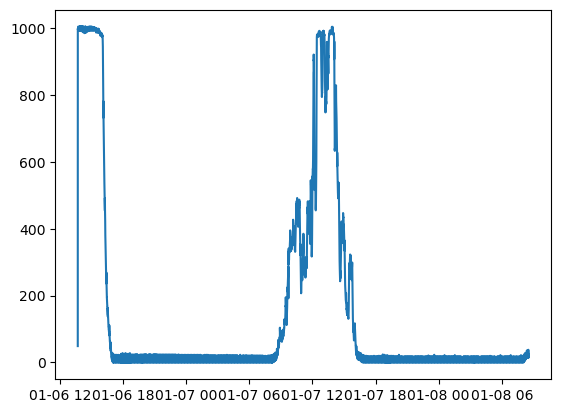

In [45]:
# call matplotlib to plot the individual data vectors
plt.plot(t,brightness)

#### Further resources

https://matplotlib.org/stable/gallery/index

https://matplotlib.org/stable/tutorials/index.html